### Passenger Satisfaction Survey

Priorities for all significant businesses should center on customer satisfaction. Similar to other industries, the aviation sector must constantly develop methods for measuring consumer satisfaction.

The goal of this project is to analyze the data collected by the airline company and build a model that predicts whether or not a passenger will be satisfied with the airline and be able to use the airline in the future. A satisfied passenger is more likely to use an airline again than an unsatisfied passenger.

It could be possible to determine the reasons behind the dissatisfaction of some passengers and make necessary adjustments if you can correctly which passengers are going to be dissatisfied.

This project aims to address the following two issues: 
- What is the likelihood that a passenger will not be satisfied with the airline's services?
- What are the main causes of a passenger's dissatisfaction with the services received prior to and during a flight?

In [34]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The data source used in this project is available [here](https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction)

In [7]:
df=pd.read_csv('airline_passenger_satisfaction.csv')

In [9]:
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
df['satisfaction'].value_counts(normalize=True)*100

neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64

It is a fairly balanced dataset with 56.55% of the passengers neutral or satisfied with the airline while 43.44 % were satisfied with the airlines services.

### Exploratory Data Analysis (EDA)

#### Check for possible missing values

In [11]:
df.isna().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

The dataset looks fairly clean. All the features except the column 'arrival_delay_in_minutes' had no missing values. Since only 0.3% of the 'arrival_delay_in_minutes' column was missing, we can drop the missing values.

In [12]:
print('percent_missing: ' + str((df.isna().sum()/len(df))*100))

percent_missing: Unnamed: 0                           0.000000
Gender                               0.000000
customer_type                        0.000000
age                                  0.000000
type_of_travel                       0.000000
customer_class                       0.000000
flight_distance                      0.000000
inflight_wifi_service                0.000000
departure_arrival_time_convenient    0.000000
ease_of_online_booking               0.000000
gate_location                        0.000000
food_and_drink                       0.000000
online_boarding                      0.000000
seat_comfort                         0.000000
inflight_entertainment               0.000000
onboard_service                      0.000000
leg_room_service                     0.000000
baggage_handling                     0.000000
checkin_service                      0.000000
inflight_service                     0.000000
cleanliness                          0.000000
departure_delay_i

In [13]:
df=df.dropna().reset_index(drop=True)

In [14]:
df.isna().sum()

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

##### Check for Duplicated records

In [15]:
len(df[df.duplicated()==True])

0

There was no duplicated observations in the dataset

#### Check for Possible Outliers

In [17]:
df.describe(include=np.number)

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64936.242797,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37495.095812,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32455.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64938.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97408.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [412]:
def outlier_calculator(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    outliers=df[(df<lower_limit)|(df>upper_limit)]
    return outliers

In [18]:
df.columns

Index(['Unnamed: 0', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [414]:
outlier_distance=outlier_calculator(df['flight_distance'])
len(outlier_distance)

2847

<Axes: xlabel='age'>

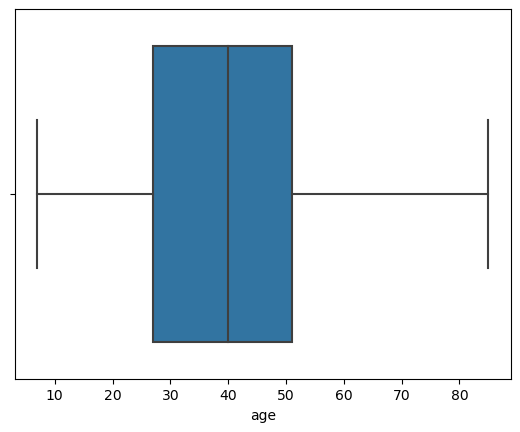

In [19]:
sns.boxplot(data=df,x='age')

<Axes: xlabel='flight_distance'>

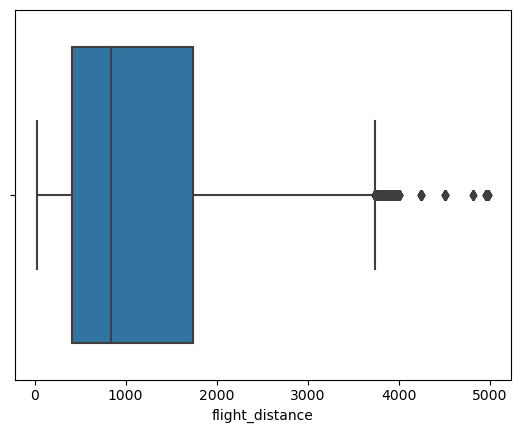

In [20]:
sns.boxplot(data=df,x='flight_distance')

In [418]:
outlier = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outlier.append(i)
    return outlier

In [299]:
len(detect_outliers_zscore(df.departure_delay_in_minutes))

2716

In [300]:
len(detect_outliers_zscore(df.age))

2741

The box plot visualization shows us a number of outliers in some of the columns. However, these are true outliers,legitimate anomalies that show the true variation in the column. So We keep these extreme values. 

During model development, Tree based models that we will be using for prediction can perform well even when there is presence of outliers. 

#### Visualization

Now let's examine variables that we are interested in, and create plots to visualize relationships between variables.

More interactive visualization is done using Tableau.

<Axes: xlabel='age', ylabel='Count'>

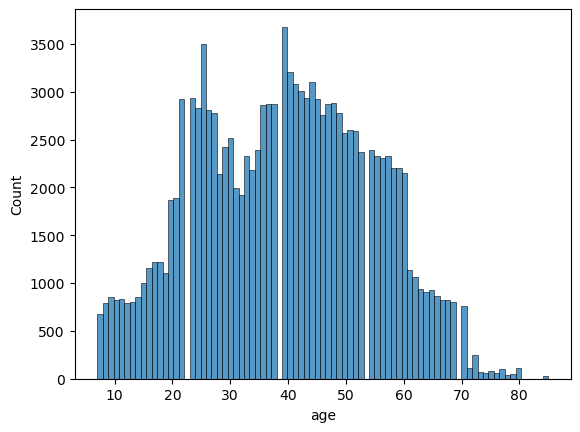

In [21]:
sns.histplot(df.age)

<Axes: xlabel='satisfaction', ylabel='ease_of_online_booking'>

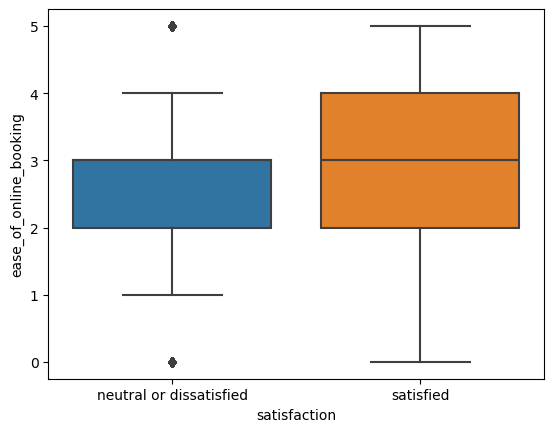

In [22]:
sns.boxplot(data=df,y='ease_of_online_booking',x='satisfaction')

Satisfied passengers had a on average higher ease of online booking ratings compared to those who were either neutral or dissatisfied.

<Axes: xlabel='online_boarding', ylabel='Count'>

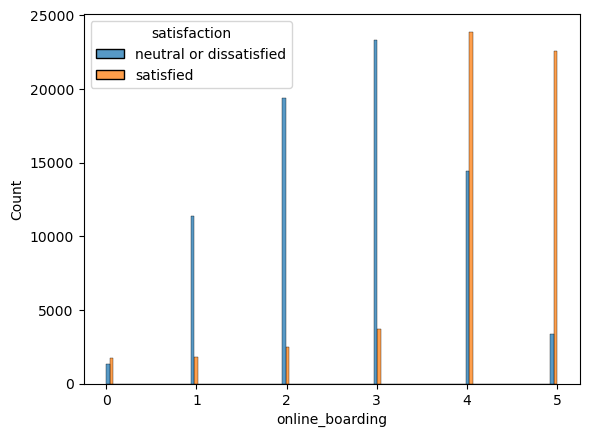

In [24]:
sns.histplot(data=df,x='online_boarding',hue='satisfaction',multiple='dodge')

In [153]:
df.groupby(['satisfaction'])[['online_boarding']].agg([np.median,np.mean])

online_boarding          
                                 median      mean
satisfaction                                     
neutral or dissatisfied             3.0  2.658846
satisfied                           4.0  4.025648

In [26]:
df.groupby(['satisfaction'])[['departure_delay_in_minutes']].agg([np.median,np.mean])


departure_delay_in_minutes           
                                            median       mean
satisfaction                                                 
neutral or dissatisfied                        0.0  16.340184
satisfied                                      0.0  12.435001

<Axes: xlabel='customer_class', ylabel='seat_comfort'>

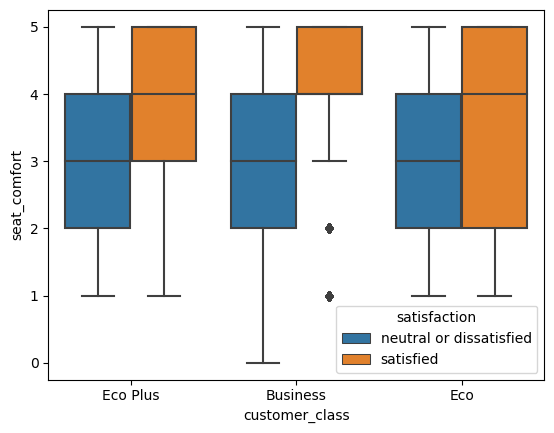

In [25]:
sns.boxplot(data=df,y='seat_comfort',x='customer_class',hue='satisfaction')

<Axes: xlabel='seat_comfort', ylabel='inflight_entertainment'>

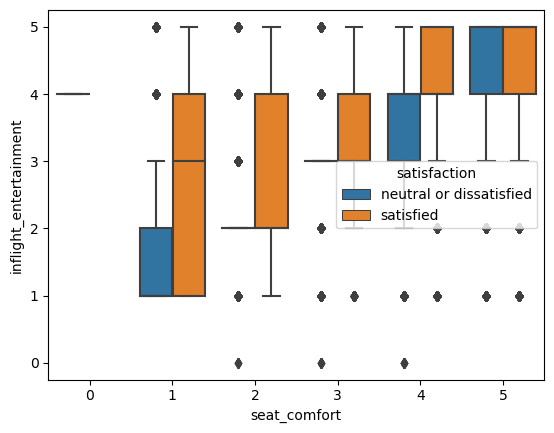

In [190]:
sns.boxplot(data=df,y='inflight_entertainment',x='seat_comfort',hue='satisfaction')

Satisfied passengers had a much better seat comfort and inflight entertainement experience on the planes than that the neutral or dissatisfied pasengers.

##### Check for Multicollinearity

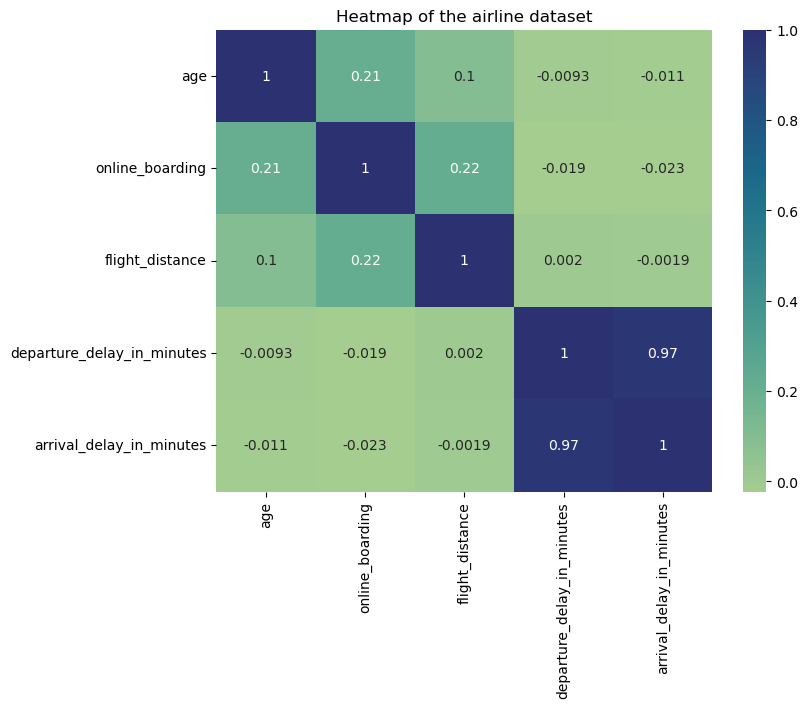

In [69]:
# set the figure for the heatmap
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix of selected features
sns.heatmap(df[['age', 'online_boarding', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']].corr(),
            annot=True, cmap='crest')

# Set the title for the heatmap
plt.title('Heatmap of the airline dataset')

# Display the heatmap
plt.show()

'arrival_delay_in_minutes' and 'departure_delay_in_minutes' are highly correlated. We can drop arrival delay column as any delays on arrival time could be caused by delays in departure.

##### Data Pre-Processing and Feature Transformation

Now it is time for data pre-processing before building a machine learning model. Most machine learning algorithms can not work with categorical data. We need to transform the categorical columns in the dataset to numeric data.

In [28]:
df.columns

Index(['Unnamed: 0', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

Let's create two column types numerical and categorical columns and drop unwanted ones like 'unnamed' and the highly correlated one we see in the previous section 'arrival_delay_in_minutes'

In [29]:
num_columns=['age','flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes']
cat_columns=['Gender',
       'type_of_travel', 'customer_class', 'customer_type']
target_variable=['satisfaction']

In [72]:
# Transforming categorical labels of 'satisfaction' column to numerical labels (0 and 1)
le=LabelEncoder()
df.satisfaction=le.fit_transform(df.satisfaction)
df.satisfaction.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [73]:
le = LabelEncoder()

for category in cat_columns:
    df[category] = le.fit_transform(df[category])

X = df[num_columns + cat_columns]
y = df[target_variable]

In [74]:
X.shape

(129487, 21)

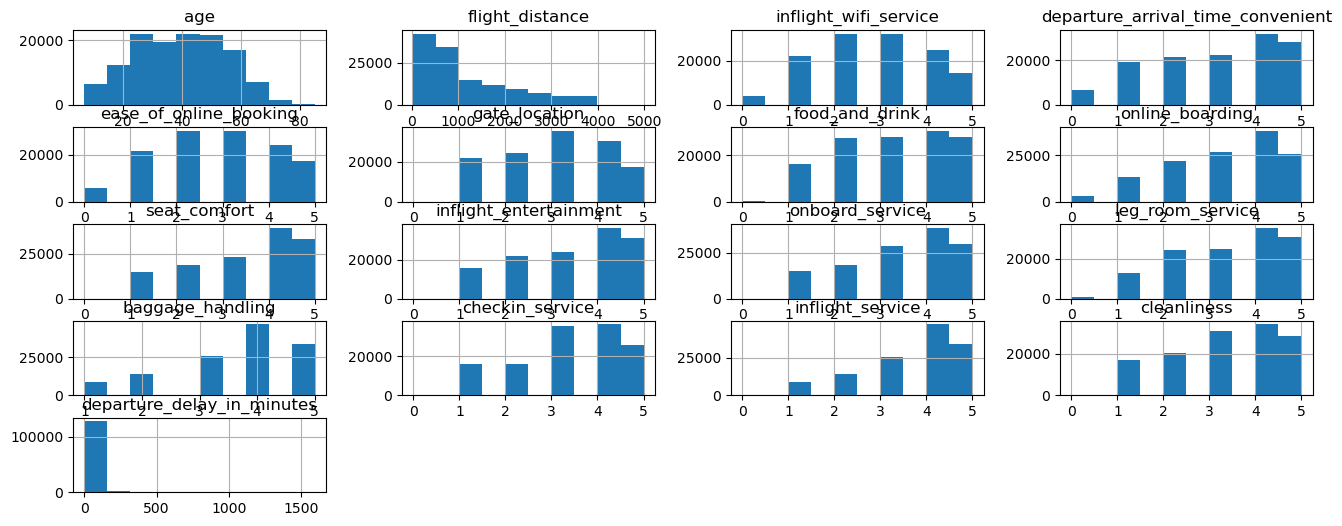

In [39]:
df[num_columns].hist(figsize=(16,6))
plt.show()

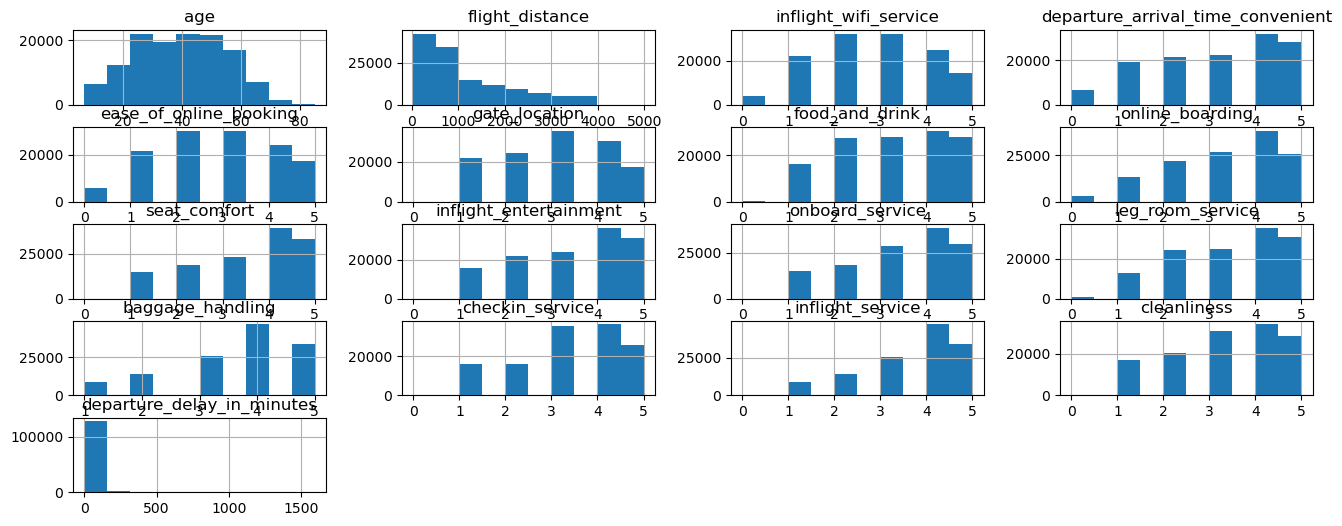

In [75]:
df[num_columns].hist(figsize=(16,6))
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.title("Histogram of Numeric Features")
plt.show()


We have to use normalization such as MinMaxScalar or StandardScaler technique to normalize the distributions of these features.

#### Model Development

Let's split the data in to trainning and testing set with 80% and 20% respectively. 
Our dataset have features that are on different ranges, and units of measurements. This extreme variation could lead us to difficulties in training the model or can lead to biased model performance.

we can use StandardScalar method to scale the the dataset. The purpose of this scaling is to ensure that all features have the same scale, which can improve the performance and convergence of machine learning models, especially those sensitive to the scale of input features.

In [77]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the preprocessing module from scikit-learn
from sklearn import preprocessing

# Initializing the StandardScaler
scaler = preprocessing.StandardScaler()

# Scaling the training data and creating a new DataFrame
X_train = pd.DataFrame(
    data=scaler.fit_transform(X_train),
    columns=X_train.columns
)

# Scaling the testing data and creating a new DataFrame
X_test = pd.DataFrame(
    data=scaler.fit_transform(X_test),
    columns=X_test.columns
)

In [78]:
X_train.shape

(103589, 21)

In [79]:
y_train.shape

(103589, 1)

In [80]:
X_test.shape

(25898, 21)

The goal of the project is to build a model that predicts whether passengers would be predicted to be either dissatified or satisfied in their flights. It is a classification problem and Logistic regression model or tree based models such as random forest, decision tree or XGBOOST models can be used.

##### A. Logistic Regression Model

In order to use logistic regression models, certain assumptions have to be met with the data we have. These assumptions are:

- The outcome variable should be binary
- Linear relationship between each predictors and logit of the response variable
- No multicollinearity between our predictors
- No extreme outliers
- The observations in the dataset are independent of each other
- Large sample size

In [81]:
log_data=df.copy()

In [83]:
# Fitting Logistic Regression model with an increased maximum number of iterations
log_model = LogisticRegression(max_iter=500).fit(X_train, y_train)

/Users/yonastena/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [84]:
# Evaluate the model on the test set
log_model_score = log_model.score(X_test, y_test)
print(f"Logistic Regression Model Accuracy on Test Set: {log_model_score:.4f}")

Logistic Regression Model Accuracy on Test Set: 0.8754


In [46]:
log_model.coef_

array([[-0.11940906, -0.00347797,  0.53794269, -0.20512643, -0.21247556,
         0.02995571, -0.01847609,  0.83274687,  0.08954536,  0.05332815,
         0.40406889,  0.32966999,  0.16408311,  0.42292964,  0.15099023,
         0.30236714, -0.18107767,  0.02813218, -1.31241298, -0.31590675,
        -0.80266827]])

In [47]:
log_model.intercept_

array([-0.49955834])

In [48]:
y_pred=log_model.predict(X_test)

In [49]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [50]:
log_model.predict_proba(X_test)

array([[0.10665955, 0.89334045],
       [0.47765569, 0.52234431],
       [0.7440485 , 0.2559515 ],
       ...,
       [0.06691354, 0.93308646],
       [0.08174429, 0.91825571],
       [0.77396841, 0.22603159]])

Use confusion matrix to visualize the results of the logistic regression model

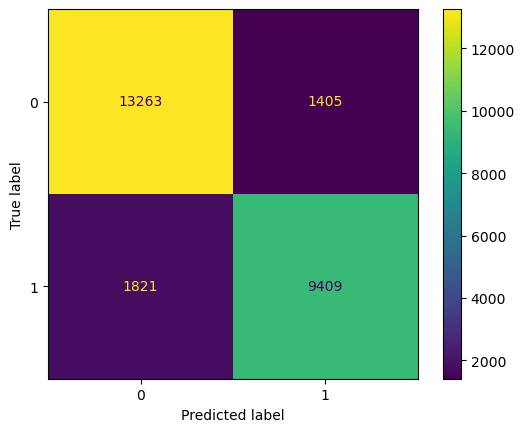

In [85]:
# Displaying the confusion matrix for the logistic regression model
log_cm=confusion_matrix(y_test,y_pred,labels=log_model.classes_)
log_model_disp=ConfusionMatrixDisplay(log_cm,display_labels=log_model.classes_)
log_model_disp.plot(values_format='')
plt.show()

Create a classification report

In [52]:
target_names = ['Predicted would be neutral/dissatisfied ', 'Predicted would be satisfied']
print(classification_report(y_test, y_pred, target_names=target_names))

                                          precision    recall  f1-score   support

Predicted would be neutral/dissatisfied        0.88      0.90      0.89     14668
            Predicted would be satisfied       0.87      0.84      0.85     11230

                                accuracy                           0.88     25898
                               macro avg       0.87      0.87      0.87     25898
                            weighted avg       0.88      0.88      0.88     25898



Accuracy is a very good metric to use for balanced data

In [53]:
Acc_LogR=metrics.accuracy_score(y_test,y_pred)
Acc_LogR

0.8754343964784925

The classification report above shows that the logistic regression model above had a precision score of 87% , recall score of 84%,acuuracy score of 88%, AUC score of 87% and f1-score of 85%.

In [87]:
# Evaluate model performance metrics
print("Accuracy_LogR:", "%.4f" % metrics.accuracy_score(y_test, y_pred))  # Accuracy of the logistic regression model
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred))      # Precision: TP / (TP + FP)
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred))            # Recall: TP / (TP + FN)
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred))              # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
print("AUC Score:", "%.4f" % metrics.roc_auc_score(y_test, y_pred))        # Area Under the ROC Curve

Accuracy_LogR: 0.8754
Precision: 0.8701
Recall: 0.8378
F1 Score: 0.8537
AUC Score: 0.8710


##### B.Decision Tree

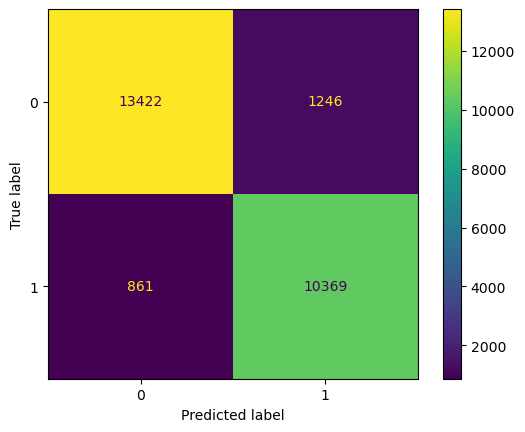

In [88]:
dt=DecisionTreeClassifier(max_depth=6,random_state=42).fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_cm=confusion_matrix(y_test,y_pred_dt,labels=dt.classes_)
dt_disp=ConfusionMatrixDisplay(dt_cm, display_labels=dt.classes_)
dt_disp.plot(values_format='')
plt.show()

In [89]:
# Evaluate the model on the test set
dt_score = dt.score(X_test, y_test)
print(f"Decision Tree Model Accuracy on Test Set: {dt_score:.4f}")

Decision Tree Model Accuracy on Test Set: 0.9186


In [90]:
print("Accuracy_decisiontree:", "%.4f" % metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred_dt))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred_dt))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred_dt))
print("AUC Score:", "%.4f" % metrics.roc_auc_score(y_test, y_pred_dt))

Accuracy_decisiontree: 0.9186
Precision: 0.8927
Recall: 0.9233
F1 Score: 0.9078
AUC Score: 0.9192


##### C. Random Forest

/Users/yonastena/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



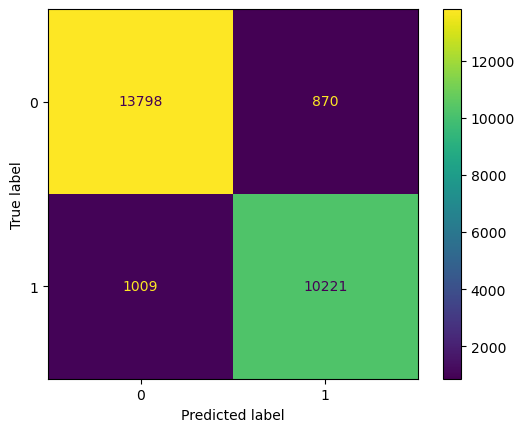

In [91]:
rf = RandomForestClassifier(max_depth=6, n_estimators=500, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_cm = confusion_matrix(y_test,y_pred_rf,labels=rf.classes_)
rf_disp = ConfusionMatrixDisplay(rf_cm,display_labels=rf.classes_)
rf_disp.plot(values_format='')
plt.show()


In [92]:
# Evaluate the model on the test set
rf_score = rf.score(X_test, y_test)
print(f"Random Forest Model Accuracy on Test Set: {rf_score:.4f}")

Random Forest Model Accuracy on Test Set: 0.9274


In [59]:
Acc_rf=metrics.accuracy_score(y_test,y_pred_rf)
Acc_rf

0.9274461348366669

In [93]:
print("Accuracy_randomforest:", "%.4f" % metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred_rf))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred_rf))
print("AUC Score:", "%.4f" % metrics.roc_auc_score(y_test, y_pred_rf))

Accuracy_randomforest: 0.9274
Precision: 0.9216
Recall: 0.9102
F1 Score: 0.9158
AUC Score: 0.9254


##### D.XGBoost

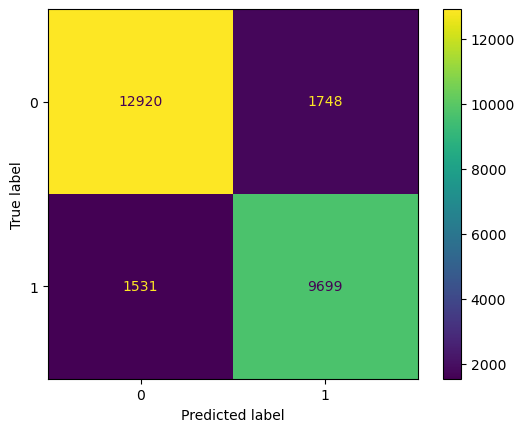

In [95]:
xgb=XGBClassifier(max_depth=6,n_estimators=500,random_state=42).fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
xgb_cm=confusion_matrix(y_test,y_pred_xgb,labels=xgb.classes_)
xgb_disp=ConfusionMatrixDisplay(xgb_cm,display_labels=xgb.classes_)
xgb_disp.plot(values_format='')
plt.show()

In [96]:
# Evaluate the model on the test set
xgb_score = xgb.score(X_test, y_test)
print(f"Xgboost Model Accuracy on Test Set: {xgb_score:.4f}")

Xgboost Model Accuracy on Test Set: 0.8734


In [98]:
Acc_xgb=metrics.accuracy_score(y_test,y_pred_xgb)
Acc_xgb

0.8733879064020388

In [97]:
print("Accuracy_Xgboost:", "%.4f" % metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred_xgb))
print("AUC Score:", "%.4f" % metrics.roc_auc_score(y_test, y_pred_xgb))

Accuracy_Xgboost: 0.8734
Precision: 0.8473
Recall: 0.8637
F1 Score: 0.8554
AUC Score: 0.8722


In [100]:
models_df = pd.DataFrame({
    'Model' : ['Logistic Regression',  'Decision Tree Classifier', 'Random Forest Classifier','XgBoost'],
    'Score' : [Acc_LogR,  Acc_dt, Acc_rf, Acc_xgb]
})

models_df.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.927446
1,Decision Tree Classifier,0.918642
0,Logistic Regression,0.875434
3,XgBoost,0.873388


In [101]:
px.bar(data_frame = models_df, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

The random forest model performed better and had a higher accuracy 92.74 % and is the champion model for prediction.

What features contribute more to an airline passenger to be satisfied or unsatisfied and come back again in the futre?

##### Feature Importance

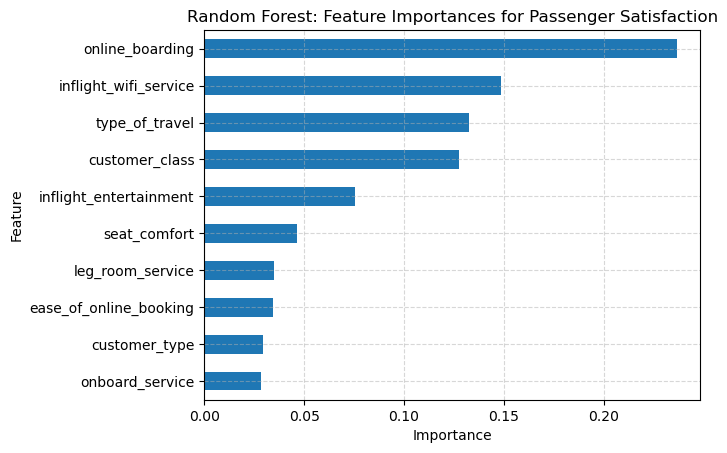

In [108]:
# Get feature importances
feat_impt = rf.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]
# create a dataframe and sort it based on importance
y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt}).sort_values("Importance")

# Use a horizontal bar chart for better readability
y_df.plot.barh(x="Feature", y="Importance", title="Random Forest: Feature Importances for Passenger Satisfaction", legend=False)

# It's a good practice to add labels to both axes for clarity.
plt.xlabel("Importance")
plt.ylabel("Feature")

#add line grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Conclusion and Recommendations

The most important factors when it comes to passenger satisfaction for the airline was online boarding availability and ratings, inflight wifi service availability and ratings, customer class (whether one is using Business or Eco or Eco plus customer),type of travel (whether it is a business or personal travel). 

The airline need to improve its service in Eco and Eco Plus Customer class where the majority of its customers are clearly unsatisfied with the services.

Th three best areas the airline performed best was the inflight service, The Baggage handling,the seat comfort. However, it has fared very poorly on Ease of online booking, and inflight wifi service. The airline performed 12.1 % and 15% below the average on their online booking and inflight wifi services respectively.

The airline also need to do better on its access to its gate location as the service was average. 